In [1]:

import librosa
from librosa import display

data, sampling_rate = librosa.load('D:/mini project/Models/examples1.wav')

In [2]:

% pylab inline

import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

UsageError: Line magic function `%` not found.


In [7]:
import time
import os
import numpy as np
path = 'D:/mini project/Models/features/'
lst=[]


start_time = time.time()

for subdir, dirs, files in os.walk(path):
      for file in files:
        if file[7:8] in ['2','3','4','5']:
            try:
                X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
       
                file = int(file[7:8]) - 1 
                arr = mfccs, file
                lst.append(arr)
   
            except ValueError:
                continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))


--- Data loaded. Loading time: 90.42879271507263 seconds ---


In [8]:
 X, y = zip(*lst)

In [9]:

import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2704, 40), (2704,))

In [11]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'D:/mini project/Models/joblib_features'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))


In [48]:
import joblib
X = joblib.load('D:/mini project/Models/joblib_features/X.joblib')
y = joblib.load('D:/mini project/Models/joblib_features/y.joblib')

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)


In [51]:

x_traincnn.shape, x_testcnn.shape

((1811, 40, 1), (893, 40, 1))

In [52]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, rho=0.9, epsilon=None, decay=0.0)


In [53]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 40, 128)           768       
_________________________________________________________________
activation_15 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_16 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                

In [54]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [55]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))


Epoch 1/500
114/114 [==============================] - 1s 7ms/step - loss: 5.2254 - accuracy: 0.2391 - val_loss: 1.5773 - val_accuracy: 0.3449
Epoch 2/500
114/114 [==============================] - 1s 6ms/step - loss: 1.2529 - accuracy: 0.4660 - val_loss: 1.1404 - val_accuracy: 0.5073
Epoch 3/500
114/114 [==============================] - 1s 6ms/step - loss: 1.0882 - accuracy: 0.5356 - val_loss: 1.0681 - val_accuracy: 0.5207
Epoch 4/500
114/114 [==============================] - 1s 6ms/step - loss: 1.0092 - accuracy: 0.5748 - val_loss: 1.0267 - val_accuracy: 0.5521
Epoch 5/500
114/114 [==============================] - 1s 6ms/step - loss: 0.9554 - accuracy: 0.5875 - val_loss: 0.9612 - val_accuracy: 0.5857
Epoch 6/500
114/114 [==============================] - 1s 6ms/step - loss: 0.9199 - accuracy: 0.6118 - val_loss: 0.9462 - val_accuracy: 0.5655
Epoch 7/500
114/114 [==============================] - 1s 6ms/step - loss: 0.8921 - accuracy: 0.6218 - val_loss: 0.8998 - val_accuracy: 0.6025

Epoch 58/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5824 - accuracy: 0.7753 - val_loss: 0.6354 - val_accuracy: 0.7346
Epoch 59/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5820 - accuracy: 0.7736 - val_loss: 0.6402 - val_accuracy: 0.7178
Epoch 60/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5777 - accuracy: 0.7708 - val_loss: 0.7407 - val_accuracy: 0.6775
Epoch 61/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5762 - accuracy: 0.7703 - val_loss: 0.5888 - val_accuracy: 0.7749
Epoch 62/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5746 - accuracy: 0.7758 - val_loss: 0.7091 - val_accuracy: 0.7021
Epoch 63/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5724 - accuracy: 0.7758 - val_loss: 0.6429 - val_accuracy: 0.7380
Epoch 64/500
114/114 [==============================] - 1s 6ms/step - loss: 0.5665 - accuracy: 0.7808 - val_loss: 0.6054 - val_accuracy:

Epoch 115/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4874 - accuracy: 0.8200 - val_loss: 0.5948 - val_accuracy: 0.7492
Epoch 116/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4853 - accuracy: 0.8156 - val_loss: 0.5936 - val_accuracy: 0.7436
Epoch 117/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4832 - accuracy: 0.8167 - val_loss: 0.5180 - val_accuracy: 0.8186
Epoch 118/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4842 - accuracy: 0.8183 - val_loss: 0.5044 - val_accuracy: 0.8119
Epoch 119/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4827 - accuracy: 0.8123 - val_loss: 0.5533 - val_accuracy: 0.7581
Epoch 120/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4756 - accuracy: 0.8167 - val_loss: 0.5027 - val_accuracy: 0.8242
Epoch 121/500
114/114 [==============================] - 1s 7ms/step - loss: 0.4752 - accuracy: 0.8255 - val_loss: 0.5521 - val_ac

114/114 [==============================] - 1s 6ms/step - loss: 0.4308 - accuracy: 0.8454 - val_loss: 0.4876 - val_accuracy: 0.7973
Epoch 172/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4277 - accuracy: 0.8437 - val_loss: 0.5020 - val_accuracy: 0.7861
Epoch 173/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4266 - accuracy: 0.8537 - val_loss: 0.5227 - val_accuracy: 0.7682
Epoch 174/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4293 - accuracy: 0.8377 - val_loss: 0.5549 - val_accuracy: 0.7693
Epoch 175/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4255 - accuracy: 0.8459 - val_loss: 0.4534 - val_accuracy: 0.8432
Epoch 176/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4222 - accuracy: 0.8388 - val_loss: 0.5209 - val_accuracy: 0.7928
Epoch 177/500
114/114 [==============================] - 1s 6ms/step - loss: 0.4207 - accuracy: 0.8482 - val_loss: 0.5100 - val_accuracy: 0.8018

114/114 [==============================] - 1s 6ms/step - loss: 0.3897 - accuracy: 0.8542 - val_loss: 0.4504 - val_accuracy: 0.8387
Epoch 228/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3860 - accuracy: 0.8614 - val_loss: 0.4698 - val_accuracy: 0.8253
Epoch 229/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3895 - accuracy: 0.8592 - val_loss: 0.4266 - val_accuracy: 0.8477
Epoch 230/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3833 - accuracy: 0.8691 - val_loss: 0.5036 - val_accuracy: 0.7928
Epoch 231/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3853 - accuracy: 0.8625 - val_loss: 0.4326 - val_accuracy: 0.8511
Epoch 232/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3874 - accuracy: 0.8597 - val_loss: 0.4555 - val_accuracy: 0.8175
Epoch 233/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3860 - accuracy: 0.8708 - val_loss: 0.4724 - val_accuracy: 0.7839

114/114 [==============================] - 1s 6ms/step - loss: 0.3564 - accuracy: 0.8758 - val_loss: 0.4038 - val_accuracy: 0.8522
Epoch 284/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3535 - accuracy: 0.8807 - val_loss: 0.4803 - val_accuracy: 0.8108
Epoch 285/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3580 - accuracy: 0.8702 - val_loss: 0.4086 - val_accuracy: 0.8399
Epoch 286/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3541 - accuracy: 0.8741 - val_loss: 0.4331 - val_accuracy: 0.8219
Epoch 287/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3542 - accuracy: 0.8807 - val_loss: 0.4462 - val_accuracy: 0.8343
Epoch 288/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3539 - accuracy: 0.8636 - val_loss: 0.4708 - val_accuracy: 0.8052
Epoch 289/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3540 - accuracy: 0.8658 - val_loss: 0.4738 - val_accuracy: 0.7940

114/114 [==============================] - 1s 6ms/step - loss: 0.3327 - accuracy: 0.8824 - val_loss: 0.3830 - val_accuracy: 0.8555
Epoch 340/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3279 - accuracy: 0.8791 - val_loss: 0.3870 - val_accuracy: 0.8656
Epoch 341/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3343 - accuracy: 0.8796 - val_loss: 0.5142 - val_accuracy: 0.8074
Epoch 342/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3263 - accuracy: 0.8851 - val_loss: 0.3801 - val_accuracy: 0.8555
Epoch 343/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3315 - accuracy: 0.8835 - val_loss: 0.4190 - val_accuracy: 0.8421
Epoch 344/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3241 - accuracy: 0.8824 - val_loss: 0.3918 - val_accuracy: 0.8499
Epoch 345/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3281 - accuracy: 0.8780 - val_loss: 0.4288 - val_accuracy: 0.8387

114/114 [==============================] - 1s 6ms/step - loss: 0.3071 - accuracy: 0.8918 - val_loss: 0.4124 - val_accuracy: 0.8567
Epoch 396/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3085 - accuracy: 0.8851 - val_loss: 0.4108 - val_accuracy: 0.8331
Epoch 397/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3119 - accuracy: 0.8846 - val_loss: 0.3761 - val_accuracy: 0.8667
Epoch 398/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3072 - accuracy: 0.8923 - val_loss: 0.3750 - val_accuracy: 0.8578
Epoch 399/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3081 - accuracy: 0.8929 - val_loss: 0.3904 - val_accuracy: 0.8466
Epoch 400/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3086 - accuracy: 0.8907 - val_loss: 0.3679 - val_accuracy: 0.8611
Epoch 401/500
114/114 [==============================] - 1s 6ms/step - loss: 0.3055 - accuracy: 0.8940 - val_loss: 0.4510 - val_accuracy: 0.8320

114/114 [==============================] - 1s 6ms/step - loss: 0.2893 - accuracy: 0.8940 - val_loss: 0.4720 - val_accuracy: 0.8119
Epoch 452/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2899 - accuracy: 0.9006 - val_loss: 0.4134 - val_accuracy: 0.8275
Epoch 453/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2898 - accuracy: 0.9023 - val_loss: 0.3945 - val_accuracy: 0.8477
Epoch 454/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2889 - accuracy: 0.8896 - val_loss: 0.4092 - val_accuracy: 0.8567
Epoch 455/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2882 - accuracy: 0.8973 - val_loss: 0.3928 - val_accuracy: 0.8455
Epoch 456/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2866 - accuracy: 0.8945 - val_loss: 0.4181 - val_accuracy: 0.8555
Epoch 457/500
114/114 [==============================] - 1s 6ms/step - loss: 0.2847 - accuracy: 0.8973 - val_loss: 0.4723 - val_accuracy: 0.8287

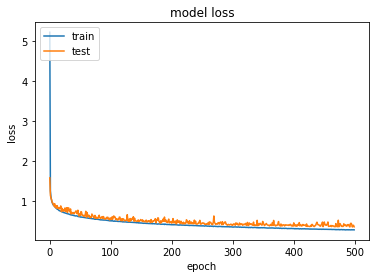

In [56]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

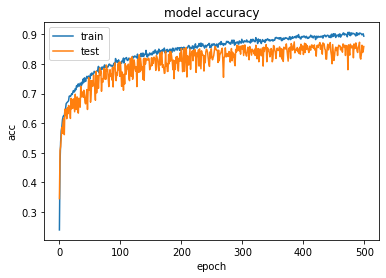

In [57]:

plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:

predictions = model.predict_classes(x_testcnn)

In [59]:
predictions

array([2, 4, 2, 3, 3, 2, 2, 1, 3, 3, 2, 4, 2, 3, 2, 1, 3, 2, 4, 1, 3, 4,
       2, 4, 3, 1, 3, 4, 3, 3, 4, 3, 2, 1, 2, 2, 4, 3, 4, 3, 2, 2, 3, 2,
       1, 1, 1, 4, 4, 3, 3, 3, 4, 2, 2, 2, 3, 1, 3, 4, 1, 3, 4, 3, 3, 3,
       2, 4, 4, 3, 1, 4, 2, 2, 2, 3, 2, 3, 2, 4, 1, 3, 4, 1, 2, 4, 3, 1,
       1, 3, 2, 2, 3, 2, 4, 3, 3, 3, 4, 2, 1, 4, 3, 4, 2, 1, 4, 3, 1, 2,
       3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 2, 4, 4, 1, 4, 4, 1, 4, 4, 3, 4, 1,
       3, 3, 4, 4, 3, 3, 1, 3, 4, 3, 2, 4, 4, 4, 2, 2, 2, 1, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 3, 2, 3, 4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       1, 3, 1, 3, 4, 3, 3, 3, 3, 4, 3, 2, 1, 2, 4, 4, 1, 4, 2, 4, 4, 2,
       3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3,
       1, 1, 2, 2, 1, 3, 4, 4, 4, 3, 4, 1, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2,
       1, 3, 4, 2, 4, 1, 3, 3, 3, 4, 2, 2, 3, 4, 1, 3, 4, 1, 3, 1, 2, 1,
       4, 3, 4, 4, 4, 4, 2, 2, 2, 3, 4, 4, 3, 2, 4, 3, 1, 2, 4, 1, 2, 4,
       4, 4, 3, 4, 3, 3, 2, 1, 1, 3, 1, 4, 4, 4, 1,

In [60]:
y_test

array([2, 4, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 2, 1, 3, 4,
       2, 2, 3, 1, 2, 4, 3, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 3, 2, 2, 3, 2,
       1, 1, 1, 4, 2, 3, 3, 3, 4, 2, 2, 2, 3, 3, 3, 4, 1, 3, 4, 3, 3, 3,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 3, 2, 3, 2, 4, 1, 3, 4, 1, 1, 4, 3, 1,
       4, 3, 2, 2, 3, 2, 4, 3, 2, 3, 4, 2, 1, 4, 1, 4, 2, 1, 2, 3, 1, 2,
       3, 1, 4, 3, 4, 3, 3, 4, 4, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 3, 4, 1,
       3, 3, 4, 4, 3, 2, 1, 3, 4, 3, 2, 4, 4, 4, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 4, 2, 3, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 3, 1, 3, 4, 3, 3, 3, 3, 4, 3, 2, 1, 2, 3, 2, 1, 4, 4, 2, 4, 2,
       3, 2, 2, 1, 3, 4, 4, 4, 4, 4, 1, 4, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       1, 1, 2, 2, 1, 3, 4, 4, 4, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1, 4, 3, 3,
       2, 3, 3, 2, 2, 1, 3, 4, 1, 4, 2, 2, 3, 4, 2, 3, 4, 1, 3, 1, 2, 1,
       4, 3, 4, 4, 4, 2, 2, 2, 2, 3, 4, 1, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4,
       3, 4, 3, 4, 3, 3, 2, 1, 1, 3, 2, 4, 2, 4, 1,

In [61]:

new_Ytest = y_test.astype(int)

In [62]:
new_Ytest


array([2, 4, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 2, 1, 3, 4,
       2, 2, 3, 1, 2, 4, 3, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 3, 2, 2, 3, 2,
       1, 1, 1, 4, 2, 3, 3, 3, 4, 2, 2, 2, 3, 3, 3, 4, 1, 3, 4, 3, 3, 3,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 3, 2, 3, 2, 4, 1, 3, 4, 1, 1, 4, 3, 1,
       4, 3, 2, 2, 3, 2, 4, 3, 2, 3, 4, 2, 1, 4, 1, 4, 2, 1, 2, 3, 1, 2,
       3, 1, 4, 3, 4, 3, 3, 4, 4, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 3, 4, 1,
       3, 3, 4, 4, 3, 2, 1, 3, 4, 3, 2, 4, 4, 4, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 4, 2, 3, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 3, 1, 3, 4, 3, 3, 3, 3, 4, 3, 2, 1, 2, 3, 2, 1, 4, 4, 2, 4, 2,
       3, 2, 2, 1, 3, 4, 4, 4, 4, 4, 1, 4, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       1, 1, 2, 2, 1, 3, 4, 4, 4, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1, 4, 3, 3,
       2, 3, 3, 2, 2, 1, 3, 4, 1, 4, 2, 2, 3, 4, 2, 3, 4, 1, 3, 1, 2, 1,
       4, 3, 4, 4, 4, 2, 2, 2, 2, 3, 4, 1, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4,
       3, 4, 3, 4, 3, 3, 2, 1, 1, 3, 2, 4, 2, 4, 1,

In [63]:

from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.74      0.78      0.76       123
           2       0.90      0.81      0.85       253
           3       0.86      0.88      0.87       255
           4       0.88      0.92      0.90       262

    accuracy                           0.86       893
   macro avg       0.84      0.85      0.85       893
weighted avg       0.86      0.86      0.86       893



In [64]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

[[ 96   9  13   5]
 [ 15 204  15  19]
 [ 14   8 225   8]
 [  5   6   9 242]]


In [65]:
import os
import tensorflowjs as tfjs
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = 'D:/mini project/Models/'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
model_ts_name = 'Emotion_Voice_Detection_ts_Model.h5'
save_ts_dir = 'D:/mini project/Models/'
if not os.path.isdir(save_ts_dir):
    os.makedirs(save_ts_dir)
model_ts_path = os.path.join(save_ts_dir, model_ts_name)
tfjs.converters.save_keras_model(model,model_ts_path)

print('Saved trained model at %s ' % model_path)

Saved trained model at D:/mini project/Models/Emotion_Voice_Detection_Model.h5 


In [66]:
import tensorflow.keras
loaded_model = tensorflow.keras.models.load_model('D:/mini project/Models/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 40, 128)           768       
_________________________________________________________________
activation_15 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_16 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                

In [68]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print(" accuracy: {:5.2f}%".format(100*acc))

28/28 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8589
 accuracy: 85.89%


In [76]:
import librosa
data, sampling_rate = librosa.load('D:/mini project/Models/examples2.wav', res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)

x = np.expand_dims(mfccs, axis=-1)

x = np.expand_dims(x, axis=0)
print(x.shape)
predictions = loaded_model.predict_classes(x)
print( "Prediction is", " ",predictions)

(1, 40, 1)
Prediction is   [1]
